In [13]:
!git add .

In [14]:
!git commit -m "Descrição do problema, criação do notebook, criação do .gitignore e acessos ao database na aws"

[main a83bcb1] Descrição do problema, criação do notebook, criação do .gitignore e acessos ao database na aws
 2 files changed, 305 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 health_insurance_cross_sell.ipynb


In [15]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 2.95 KiB | 2.95 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To github.com:wilianuhlmann/health_insurance_cross_sell.git
   8db2e24..a83bcb1  main -> main


## The problem:

Uma empresa de seguros de saúde precisa detectar os clientes que são mais propensos a comprar um seguro de automóvel. 

O desafio é calcular a propensão de compra de cada cliente da base e retornar para o time de negócio, uma lista priorizada, começando pelo cliente mais propenso até o menor propenso.

# 0.0. Imports

## 0.1. lib imports

In [18]:
from acessos import database_name, host, port, user, password
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql

## 0.2 Helper Functions

In [11]:
def conn:
    pass

SyntaxError: invalid syntax (1559221371.py, line 1)

# 1.0. Schema Query

In [17]:
conn = pg.connect(user = user, 
                  password = password,
                  host = host,
                  port = port,
                  database = database_name)

In [15]:
cursor = conn.cursor()
query_schema = """
                    SELECT nspname
                    FROM pg_catalog.pg_namespace
"""

In [16]:
cursor.execute(query_schema)
record = cursor.fetchall()
cursor.close()
conn.close()

In [28]:
print(record)

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',), ('pg_temp_4',), ('pg_toast_temp_4',), ('pa005',), ('pg_temp_9',), ('pg_toast_temp_9',)]


# 2.0. Table Query

In [43]:
cursor = conn.cursor()
query_schema = """
                    SELECT tablename
                    FROM pg_tables
                    WHERE schemaname='pa004'
"""

cursor.execute(query_schema)
record = cursor.fetchall()
cursor.close()
conn.close()

In [44]:
print(record)

[('users',), ('vehicle',), ('insurance',)]


# 3.0. Collect Data using Psycopg2

In [46]:
cursor = conn.cursor()
query_tables_users = """
                    SELECT *
                    FROM pa004.users u
                    WHERE u.age > 44
                    LIMIT 10
"""

cursor.execute(query_tables_users)
record = cursor.fetchall()
print(record)
cursor.close()
conn.close()

[(2, 'Male', 76, 3.0, 26.0), (3, 'Male', 47, 28.0, 26.0), (8, 'Female', 56, 28.0, 26.0), (11, 'Female', 47, 35.0, 124.0), (14, 'Male', 76, 28.0, 13.0), (15, 'Male', 71, 28.0, 30.0), (20, 'Female', 60, 33.0, 124.0), (21, 'Male', 65, 28.0, 124.0), (22, 'Male', 49, 28.0, 124.0), (27, 'Female', 51, 28.0, 124.0)]


# 4.0. Collect Data using Pandas

In [21]:
query_tables_users = """
                    SELECT *
                    FROM pa004.users u
                    INNER JOIN pa004.vehicle v ON (u.id = v.id)
                    INNER JOIN pa004.insurance i ON (u.id = i.id)
                    WHERE u.age > 44
                    LIMIT 10
"""
# AND date > '2019-01-01' AND date < '2020-03-01'


In [22]:
# Forma antiga de usar
df = psql.read_sql(query_tables_users, conn)
df.head

<bound method NDFrame.head of       id  gender  age  region_code  policy_sales_channel     id  \
0  16648    Male   46         28.0                  26.0  16648   
1      8  Female   56         28.0                  26.0      8   
2     11  Female   47         35.0                 124.0     11   
3     39    Male   45          8.0                 124.0     39   
4     42  Female   54         28.0                 122.0     42   
5     53  Female   49          3.0                 152.0     53   
6     58    Male   54         28.0                  26.0     58   
7     81    Male   54         26.0                  22.0     81   
8     93    Male   77         28.0                 124.0     93   
9    114    Male   50         30.0                  26.0    114   

   driving_license vehicle_age vehicle_damage     id  previously_insured  \
0                1    1-2 Year            Yes  16648                   0   
1                1    1-2 Year            Yes      8                   0   
2   

In [23]:
df1 = pd.read_sql(query_tables_users, conn)
df1 = df1.drop(df1.columns[[5, 9]], axis=1)
df1.head()

,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Female,51,28.0,124.0,1,1-2 Year,Yes,0,38341.0,49,1
1,Female,80,50.0,8.0,1,1-2 Year,Yes,0,32357.0,46,0
2,Male,48,28.0,124.0,1,1-2 Year,No,1,25067.0,174,0
3,Male,50,28.0,52.0,1,1-2 Year,Yes,0,48231.0,196,0
4,Female,51,28.0,125.0,1,1-2 Year,Yes,0,36142.0,42,0


In [67]:
df1.columns

Index(['gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage',
       'previously_insured', 'annual_premium', 'vintage', 'response'],
      dtype='object')

# =================================================================================================

# 0.0. Imports

In [25]:
from acessos import database_name, host, port, user, password
import psycopg2 as pg
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas.io.sql as psql


import scikitplot as skplt

from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model    as lm

## 0.1. Load dataset

In [26]:
df_raw = pd.read_csv('data/train.csv')

In [27]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0. Data Description

In [28]:
df1 = df_raw.copy()

In [29]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [30]:
columns_news = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']

In [31]:
df1.columns = columns_news

In [32]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.1. Data Dimension

In [33]:
print('Columns: {}'.format(df1.shape[1]))
print('Row: {}'.format(df1.shape[0]))

Columns: 12
Row: 381109


## 1.2. Data Types

In [34]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3. Check NAs

In [42]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4. Data Descriptive

In [43]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

In [44]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0. Feature engineering 

In [45]:
df2 = df1.copy()

In [46]:
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2' if x == '1-2 Year' else 'below_1_year')
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

# 3.0. Data Filtering

In [47]:
df3 = df2.copy()

# 4.0 Explore Data Analyses 

In [48]:
df4 = df3.copy()

## 4.1. Univariate Analysis

<AxesSubplot:xlabel='response', ylabel='age'>

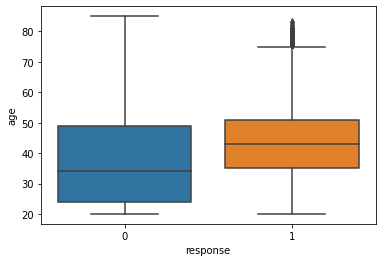

In [49]:
 #'age'
sns.boxplot( x='response', y='age', data=df4 )

<AxesSubplot:xlabel='age', ylabel='Count'>

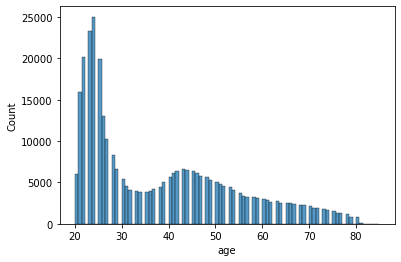

In [50]:
aux00 = df4.loc[df4['response'] == 0, 'age']
sns.histplot( aux00 )

<AxesSubplot:xlabel='age', ylabel='Count'>

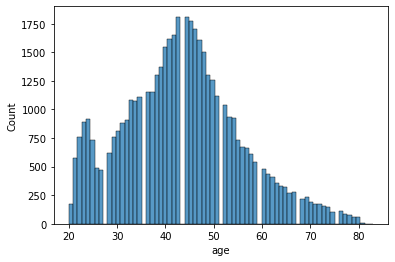

In [51]:
aux00 = df4.loc[df4['response'] == 1, 'age']
sns.histplot( aux00 )

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

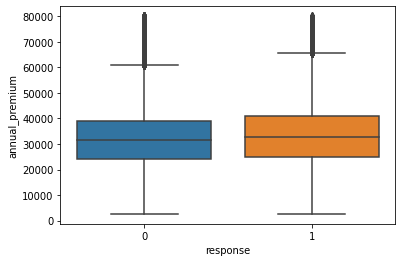

In [52]:
#'annual_premium'
aux = df4[df4['annual_premium'] < 80000]
sns.boxplot( x='response', y='annual_premium', data=aux )

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

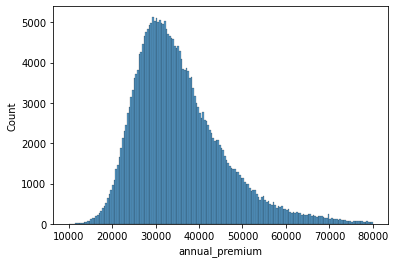

In [53]:
aux = df4[(df4['annual_premium'] > 10000) &(df4['annual_premium'] < 80000 )]
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot( aux00 )

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

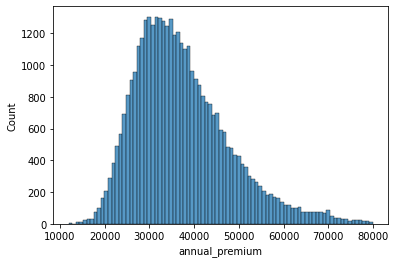

In [54]:
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot( aux00 )

In [55]:
#'driving_license'
aux = df4[['driving_license', 'response']].groupby( 'response' ).sum().reset_index()
aux.head()
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
#sns.barplot( x='response', y='driving_license', data=aux )

<AxesSubplot:xlabel='region_code', ylabel='id'>

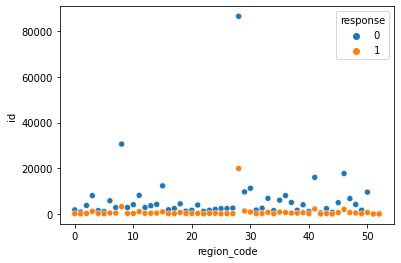

In [56]:
 # 'region_code'
aux0 = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index()

sns.scatterplot( x='region_code', y='id', hue='response', data=aux0 )

In [57]:
#'previously_insured'
pd.crosstab( df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1 )

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [58]:
#'vehicle_age'
df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()

,vehicle_age,response,0
0,between_1_2,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


<AxesSubplot:xlabel='response', ylabel='policy_sales_channel'>

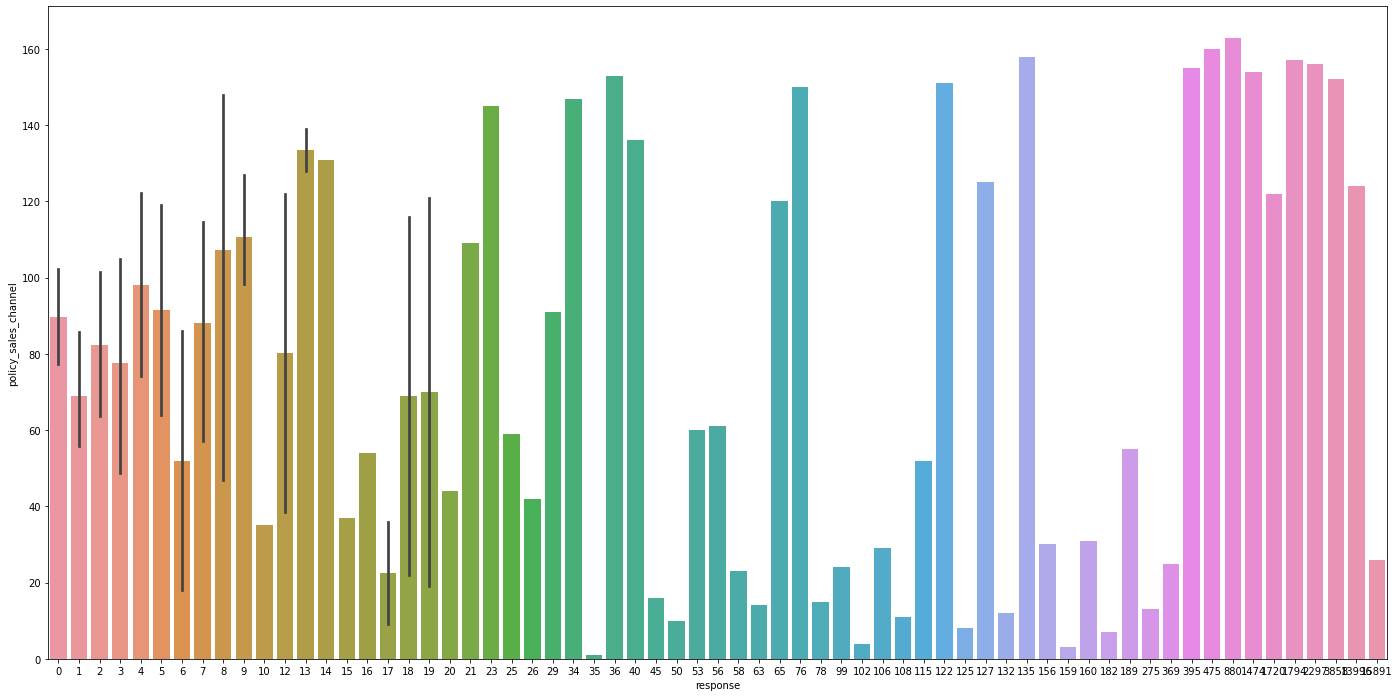

In [59]:
#'policy_sales_channel'
plt.figure( figsize=(24, 12 ))
aux = df4[['policy_sales_channel', 'response']].groupby( 'policy_sales_channel').sum().reset_index()
sns.barplot( x='response', y='policy_sales_channel', data=aux )

<AxesSubplot:xlabel='response', ylabel='vintage'>

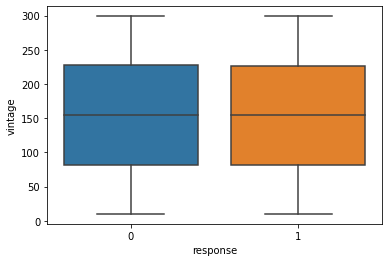

In [60]:
 #'annual_premium'
sns.boxplot( x='response', y='vintage', data=df4 )

<AxesSubplot:xlabel='vintage', ylabel='Count'>

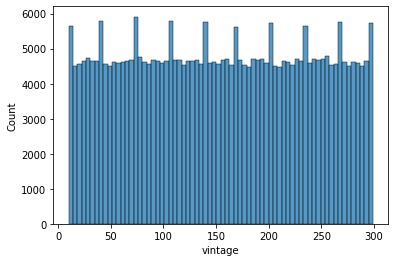

In [61]:
 aux00 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot( aux00 )

<AxesSubplot:xlabel='vintage', ylabel='Count'>

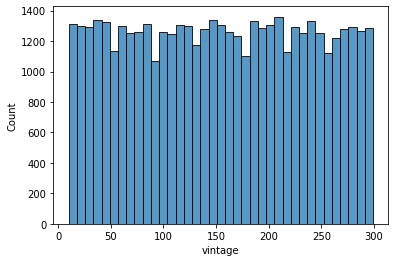

In [62]:
aux00 = df4.loc[df4['response'] == 1, 'vintage']
sns.histplot( aux00 )

# 5.0. Data Preparation

In [63]:
df5 = df4.copy()

In [64]:
X = df4.drop( 'response', axis=1 )
y = df4['response'].copy() 

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1 )

## Standardization

In [65]:
ss = pp.StandardScaler()

# annual_premium
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )

## Rescaling

In [66]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# Age
df5['age'] = mms_age.fit_transform( df5[['age']].values )

# vintage
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values )

In [67]:
df5.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## Enconder

In [68]:
# gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby( 'gender' )['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map( target_encode_gender )

# region_code - Target Encoding / Frequency Encoding
target_encode_region_code = df5.groupby( 'region_code' )['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )

# vehicle_age - One Hot Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel - Target Encoding / Frequency Encoding
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 ) 
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )

## 5.4. Validation Preparation

In [69]:
# gender
x_validation.loc[:, 'gender'] =  x_validation.loc[:, 'gender'].map( target_encode_gender )

# age
x_validation.loc[:, 'age'] = mms_age.transform( x_validation[['age']].values )

# region_code
x_validation.loc[:, 'region_code'] = x_validation.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle_age
x_validation = pd.get_dummies( x_validation, prefix='vehicle_age', columns=['vehicle_age'] )

# annual_premium
x_validation.loc[:, 'annual_premium'] = ss.transform( x_validation[['annual_premium']].values )

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map( fe_policy_sales_channel )

# vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform( x_validation[['vintage']].values )

# fillna
x_validation = x_validation.fillna( 0 )

# 6.0. Feature Selection

## 6.2. Features Importancia

In [70]:
%%time
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
forest.fit( x_train_n, y_train_n )

CPU times: user 2min 27s, sys: 3.3 s, total: 2min 30s
Wall time: 47.4 s


ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                    feature  importance
0                   vintage    0.272895
0            annual_premium    0.244367
0                       age    0.165685
0               region_code    0.105795
0            vehicle_damage    0.068441
0      policy_sales_channel    0.058880
0        previously_insured    0.056138
0  vehicle_age_below_1_year    0.013980
0   vehicle_age_between_1_2    0.006201
0                    gender    0.004907
0  vehicle_age_over_2_years    0.002229
0           driving_license    0.000482


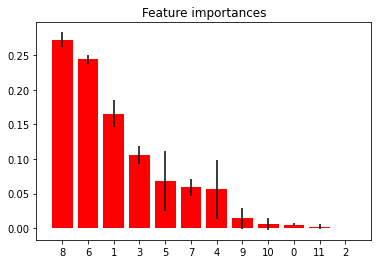

In [71]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 7.0 Machine Learning

In [72]:
 cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']

x_train = df5[ cols_selected ]
x_val = x_validation[ cols_selected ]
y_val = y_validation.copy()

## 7.1. KNN

In [73]:
%%time
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model prediction - Poder de GENERALIZACAO 
yhat_knn = knn_model.predict_proba( x_val )

CPU times: user 9.86 s, sys: 43.1 ms, total: 9.91 s
Wall time: 9.91 s


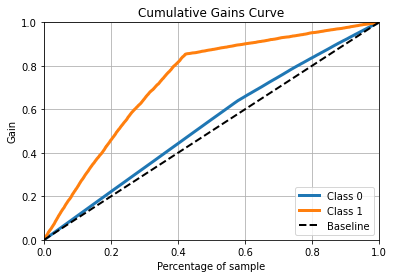

In [139]:
 # Accumulative Gain

skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


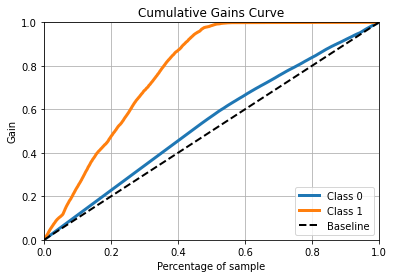

In [74]:
 %time
    # model definition
lr_model = lm.LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

## 7.2. Extra Trees

In [79]:
%%time
# model definition
et = en.ExtraTreesClassifier( n_estimators=500, n_jobs=-1, random_state=42 )

# model fit
et.fit( x_train, y_train )

# model predict
yhat_et = et.predict_proba( x_val )

CPU times: user 4min 12s, sys: 4.15 s, total: 4min 16s
Wall time: 1min 8s


In [76]:
# model predict
yhat_et = et.predict_proba( x_val )

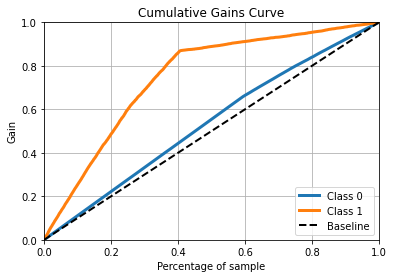

In [77]:
 # Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

CPU times: user 4.27 s, sys: 2.42 s, total: 6.69 s
Wall time: 1.97 s


<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

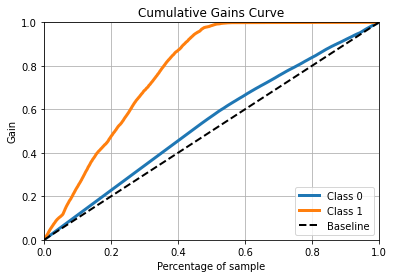

In [78]:
%%time
# model definition
lr_model = lm.LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

# 8.0. Model Performance

In [ ]:
def precision_at_k( data, k=2000 ):
    # reset index
    data = data.reset_index( drop=True )

    # create ranking order
    data['ranking'] = data.index + 1 

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k, 'precision_at_k']

In [ ]:
def recall_at_k( data, k=2000 ):
    # reset index
    data = data.reset_index( drop=True )

    # create ranking order
    data['ranking'] = data.index + 1 

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    return data.loc[k, 'recall_at_k']

In [ ]:
# copy data
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensity score
df8['score'] = yhat_knn[:, 1].tolist()

# sorte clients by propensity score
df8 = df8.sort_values( 'score', ascending=False )

# compute precision at k
precision_at_50 = precision_at_k( df8, k=50 )
print( 'Precision at K: {}'.format( precision_at_50 ) )

# compute precision at k
precision_at_50 = recall_at_k( df8, k=50 )
print( 'Recall at K: {}'.format( precision_at_50 ) )